# Numerical Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
sympy.init_printing()

Computational Science and Engineering, Gil Strang,

Chapter 3 Boundary Value Problems p. 240

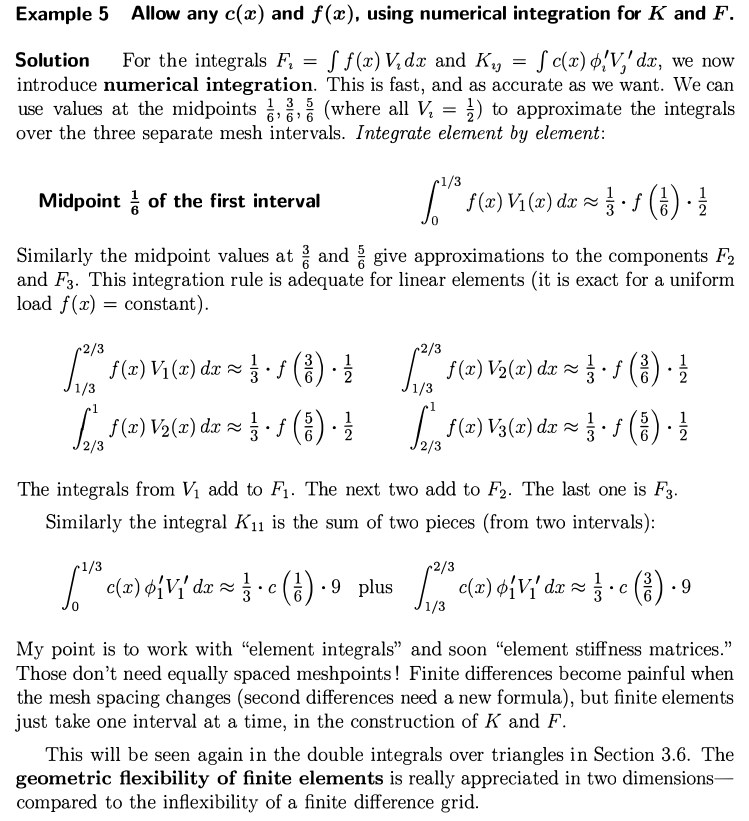

5.4 Spectral Methods of Exponential Accuracy p. 445-446

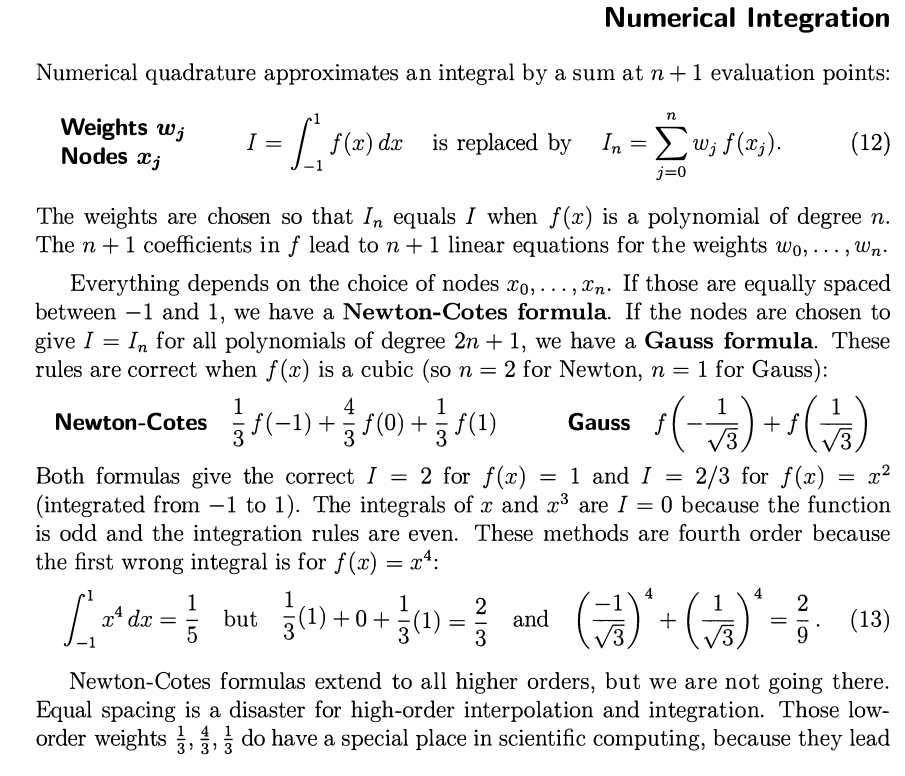
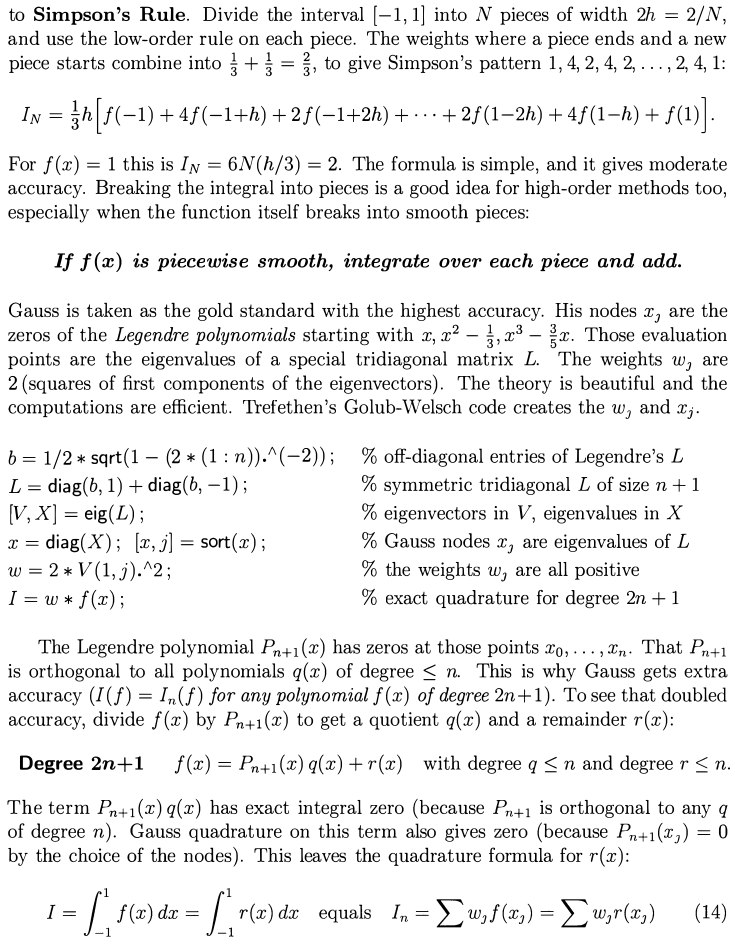
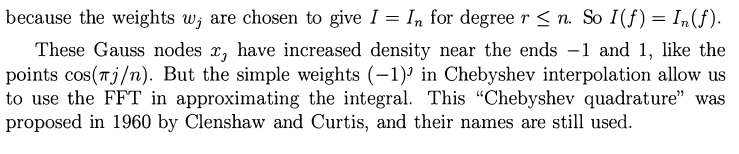

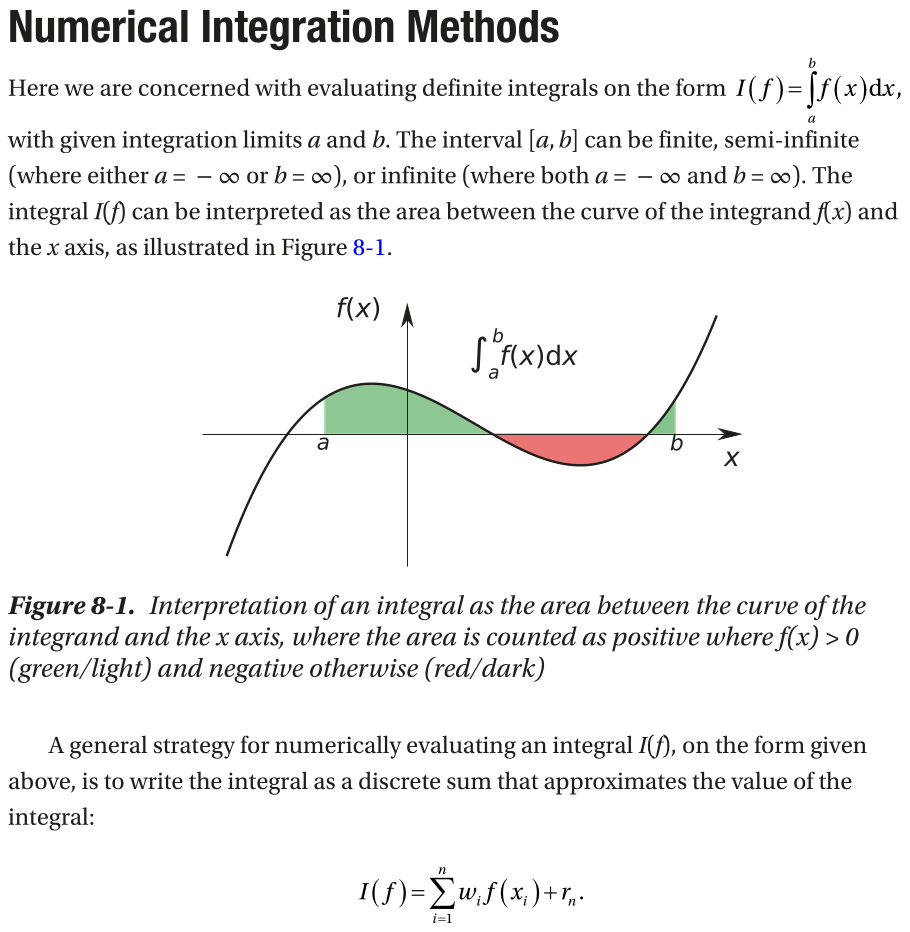
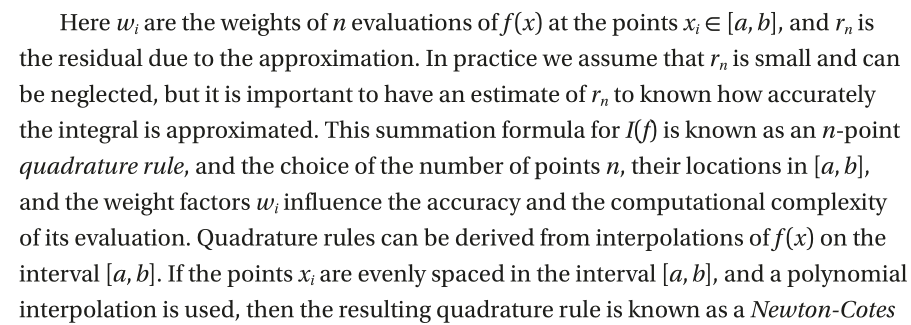
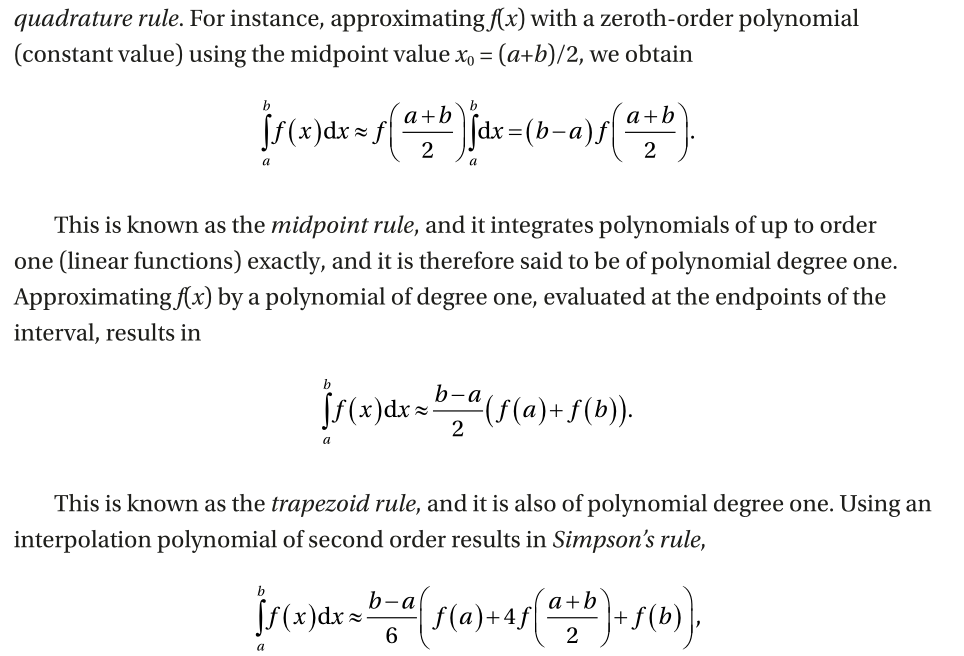

> The method of arriving at this formula can easily be demonstrated using SymPy:
First we define symbols for the variables $a$, $b$, and $x$, as well as the function $f$

In [16]:
a, b, X = sympy.symbols("a, b, x")
f = sympy.Function("f")

# for Simpson's rule
x = a, (a+b)/2, b
w = [sympy.symbols(f"w_{i}") for i in range(len(x))]

x, w

> Given $x$ and $w$, we can now construct a symbolic expression for the quadrature rule

In [17]:
q_rule = sum([w[i] * f(x[i]) for i in range(len(x))])
q_rule

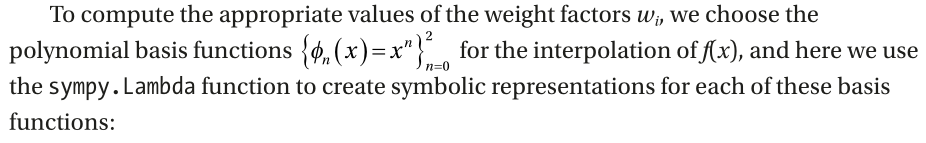

In [18]:
phi = [sympy.Lambda(X, X**n) for n in range(len(x))]
phi

The key to finding the weight factors in the quadrature expression `q_rule` is that the integral $\int_a^b \phi_n(x) dx$ can be computed analytically for each of the basis functions $\phi_n(x)$.

By substituting the function $f(x)$ with each of the basis functions $\phi_n(x)$ in the quadrature
rule, we obtain an equation system for the unknown weight factors:

$$
\sum_{i=0}^2 w_i \phi_n (x_i) = \int_a^b \phi_n(x) dx
$$

These equations are equivalent to requiring that the quadrature rule exactly
integrates all the basis functions and therefore also (at least) all functions that are
spanned by the basis. This equation system can be constructed with SymPy using

In [29]:
# Example with subs
q_rule.subs(f, phi[0]), q_rule.subs(f, phi[1]), q_rule.subs(f, phi[2])

In [31]:
# Integration example
sympy.integrate(phi[0](X), (X, a, b))

In [32]:
eqs = [q_rule.subs(f, phi[n]) - sympy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]
eqs

Solving this linear equation system gives analytical expressions for the weight
factors

Solve for $w_i$ coeff where all the eqs = 0 (to eliminate the error due approximation)

In [34]:
w_sol = sympy.solve(eqs, w)
w_sol

and by substituting the solution into the symbolic expression for the quadrature rule, we
obtain

In [37]:
q_rule.subs(w_sol).simplify()

> We recognize this result as **Simpson’s quadrature rule** given in the preceding section!
Choosing different sample points (the x tuple in this code) results in different quadrature
rules

Higher-order quadrature rules can similarly be derived using higher-order
polynomial interpolation (more sample points in the $[a, b]$ interval). However,
high-order polynomial interpolation can have undesirable behavior between the
sample points, as discussed in Chapter 7 (interpolation). Rather than using higher-order quadrature
rules, it is therefore often better to divide the integration interval $[a, b]$ into
subintervals $[a = x_0, x_1],[x_1, x_2],…,[x_N − 1, x_N = b]$ and use a low-order quadrature rule in
each of these subintervals. Such methods are known as **composite quadrature rules**.
Figure bellow shows the three lowest-order Newton-Cotes quadrature rules for the function
$f (x) = 3+x+x^2+x^3+x^4$ on the interval $[−1, 1]$ and the corresponding composite quadrature
rules with four subdivisions of the original interval.

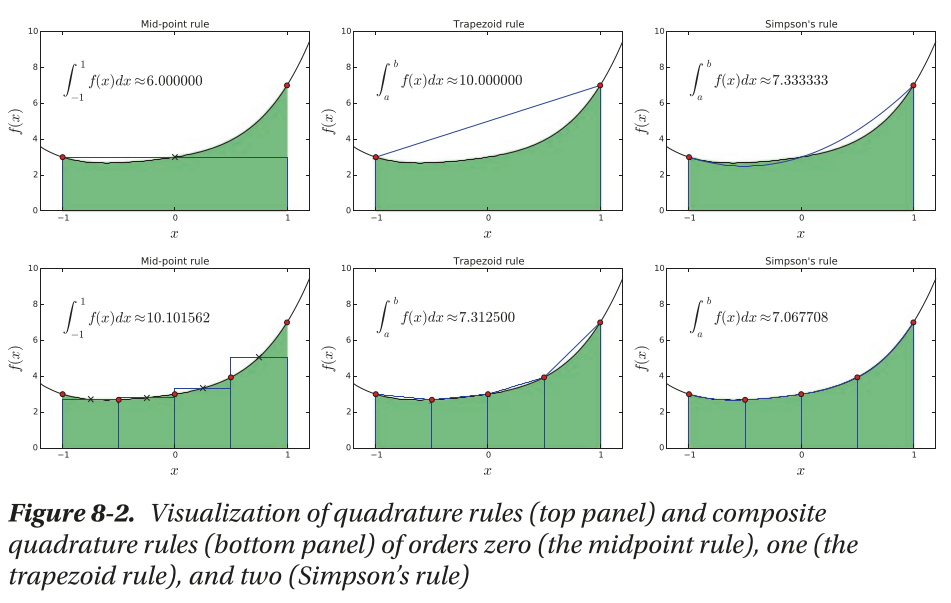

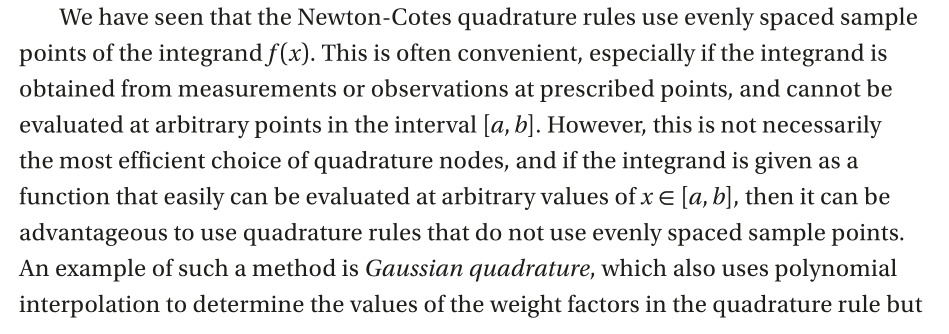

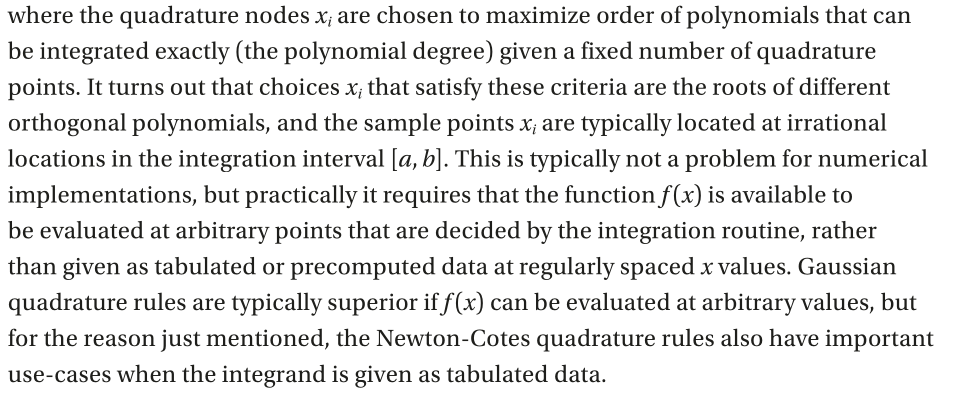